# Boston House Price Prediction

Dataset:

[Kaggle](https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction/input)

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price.

To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price).

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [98]:
import pandas as pd
import numpy as np

from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Importing the boston dataset

In [99]:
df = pd.read_csv('BostonHousing.csv')

Below are the columns and their description -

1. CRIM - Per Capita Crime Rate
2. ZN - Proportion of Residential Land Zoned for Lots over 25,000 sq. ft
3. INDUS - Proportion of Non-Retail Business Acres
4. CHAS - Charles River Variable
5. NOX - Nitric Oxide Concentration
6. RM - Average number of Rooms
7. AGE - Proportion of owner-occupied units built before 1940
8. DIS - Weighted Distances to Boston Employment Centres
9. RAD - Index of Accessibility to Radial Highways
10. TAX - Property Tax Rate per $10,000

11. PTRATIO - Student — Teacher Ration

12. B - Proportion of people of African American descent

13. LSTAT - Percentage of Lower Status of the Population
14. MEDV - Median value of owner-occupied homes in $1000, i.e., Price of the property


# Exploratory data analysis

In [100]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [101]:
df.shape

(506, 14)

In [102]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [103]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [104]:
df = df.astype(np.float64)

In [105]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [106]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [107]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [108]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [109]:
correlation = df.corr()
correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


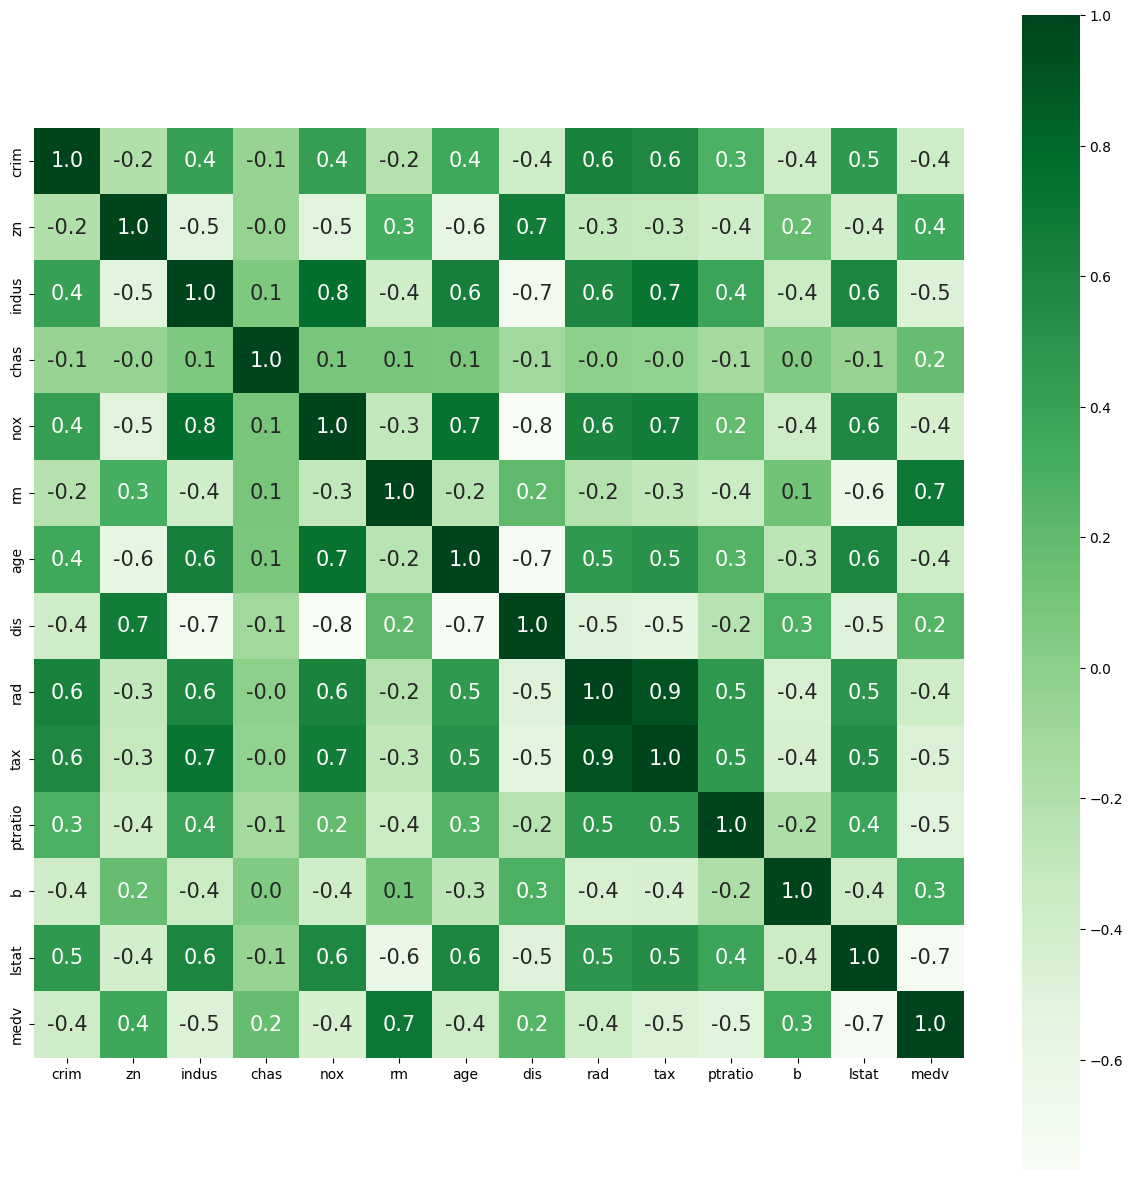

In [111]:
plt.figure(figsize = (15, 15))
sns.heatmap(correlation,cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

# Dataset

In [113]:
X = df.drop(['medv'], axis = 1)
y = df['medv']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

# 1. Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lr = LinearRegression()

In [117]:
lr.fit(X_train, y_train)

LinearRegression()

In [118]:
lr.coef_

array([-1.53776087e-01,  6.50159270e-02, -2.42597326e-02,  1.62203309e+00,
       -1.52999306e+01,  3.35196668e+00,  1.13259963e-02, -1.54810871e+00,
        3.02641886e-01, -1.22317535e-02, -8.11539044e-01,  1.29504798e-02,
       -5.44861583e-01])

In [119]:
lr.intercept_

34.244837033906975

In [121]:
#Converting the coefficient values to a dataframe
coeff = pd.DataFrame([X_train.columns,lr.coef_]).T
coeff = coeff.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeff

,Attribute,Coefficients
0,crim,-0.153776
1,zn,0.065016
2,indus,-0.02426
3,chas,1.622033
4,nox,-15.299931
5,rm,3.351967
6,age,0.011326
7,dis,-1.548109
8,rad,0.302642
9,tax,-0.012232


# Validation

In [128]:
y_train_pred = lr.predict(X_train)

In [129]:
y_train_pred

array([35.31231704, 20.5131804 , 11.40747798, 16.27533991, 24.5904819 ,
       10.42632247, 15.02055201, 25.97821899, 11.17357006, 11.71266067,
       19.29635756, 19.49836247, 32.39999007, 22.63571608, 25.67695792,
        9.05082205, 21.04375917,  6.79088241, 27.98865469, 21.06957823,
       23.97043996, 24.93815392, 27.12974364, 15.0154284 , 11.79236512,
       23.06580394, 20.46197835, 17.98676715, 22.73161742, 21.01357798,
       22.91716483, 19.49100306,  7.74358253, 32.8998121 , 21.57095713,
       17.11141117, 23.40364719, 23.47519449, 28.50530384, 22.31935862,
       31.2452869 , 34.78233041, 20.67660819, 31.20066591, 16.59407143,
       23.95262796, 21.90329885, 32.20623837, 28.04847935, 33.90562695,
       26.00621849, 21.91351966, 20.29453107, 23.13751427, 33.69867011,
       28.92749867, 30.77000611, 18.04700089, 21.26901808, 30.94275411,
       30.09782122, 36.01293201, 23.83903184, 17.53590914, 23.16151639,
       30.07109419, 21.54565578, 22.50447139, 13.87570863, 15.74

In [130]:
result = y_train - y_train_pred

<ipython-input-131-44d8422d34be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result, bins = 15)


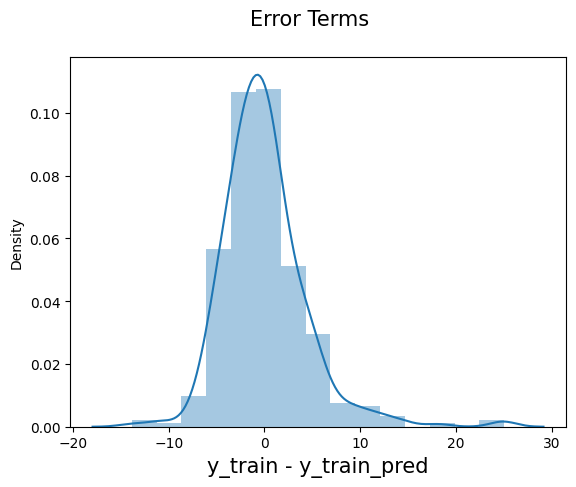

In [131]:
fig = plt.figure()
sns.distplot(result, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

# Model Evaluation


**𝑅^2** : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

**Adjusted 𝑅^2** :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

**MAE** : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.

**MSE**: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

In [133]:
print('R^2:',metrics.r2_score(y_train, y_train_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))

print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2: 0.7495400632086622
Adjusted R^2: 0.7399636538607581
MAE: 3.089247538273396
MSE: 19.459680134802593
RMSE: 4.411312745068365


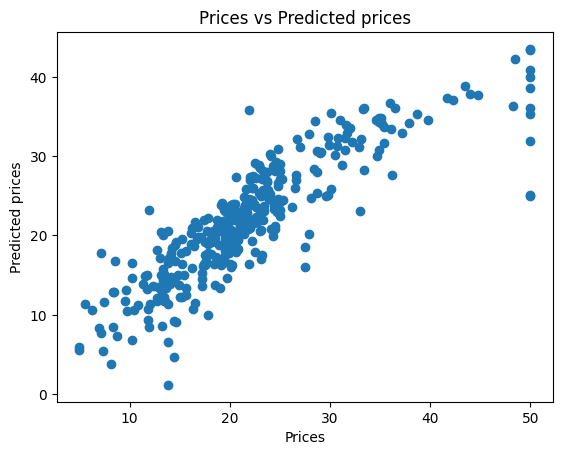

In [134]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Checking residuals

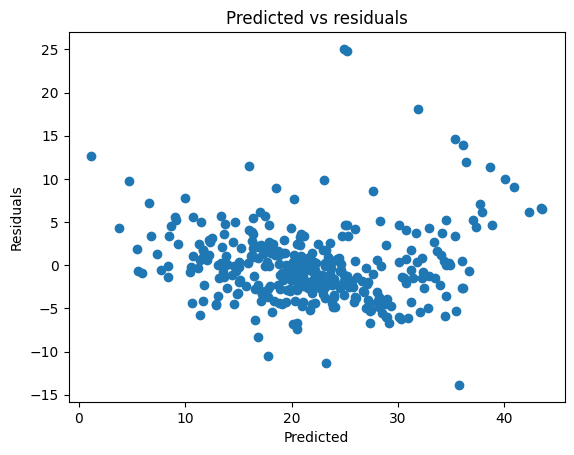

In [135]:
plt.scatter(y_train_pred, y_train - y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Prediction on test data

In [136]:
y_test_pred = lr.predict(X_test)

# Model Evaluation

In [137]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6996255772983111
Adjusted R^2: 0.6713294360293114
MAE: 3.70712713727182
MSE: 29.326596526123282
RMSE: 5.415403634644724


# 2. Random Forest

In [140]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [141]:
# Create a Random Forest Regressor
reg = RandomForestRegressor()



Training Model

In [142]:
# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [143]:
y_train_pred = reg.predict(X_train)

Evaluate against Y_trian

In [145]:
print('R^2:',metrics.r2_score(y_train, y_train_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))

print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))


R^2: 0.9792650627908458
Adjusted R^2: 0.9784722563681428
MAE: 0.8258248587570615
MSE: 1.611017118644069
RMSE: 1.2692584916572625


# Visualizing the differences between actual prices and predicted values

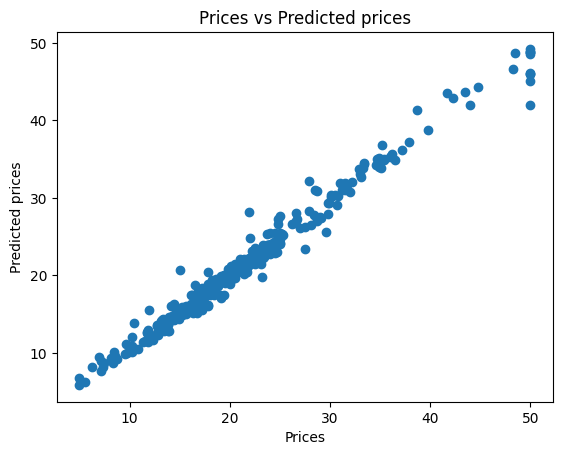

In [147]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Checking residuals

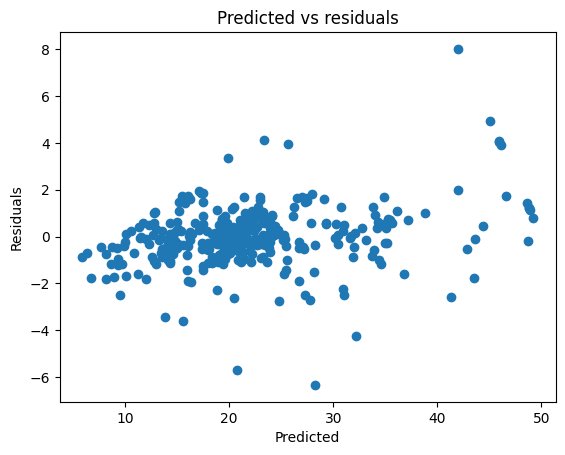

In [148]:

plt.scatter(y_train_pred, y_train - y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Model Testing

In [149]:
y_test_pred = reg.predict(X_test)

 # Model Evaluation against y_test

In [151]:
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


R^2: 0.8752537020430393
Adjusted R^2: 0.8635022391920213
MAE: 2.4241249999999996
MSE: 12.17941366447368
RMSE: 3.489901669742814


# 3, XGBoost

In [153]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
boost = XGBRegressor()

# Train the model using the training sets
boost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluate model against Y_train

In [154]:
# Model prediction on train data
y_train_pred = boost.predict(X_train)


In [156]:
# Model Evaluation

print('R^2:',metrics.r2_score(y_train, y_train_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))

print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2: 0.9999987989962554
Adjusted R^2: 0.999998753075524
MAE: 0.006829758552508209
MSE: 9.331292265692412e-05
RMSE: 0.00965986142017183


# Visualizing the differences between actual prices and predicted values

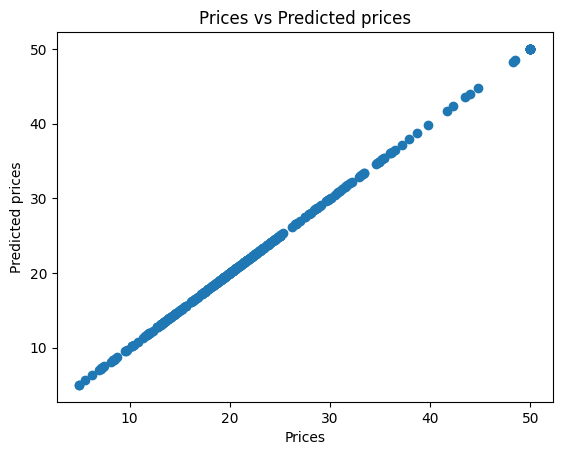

In [157]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Checking residuals

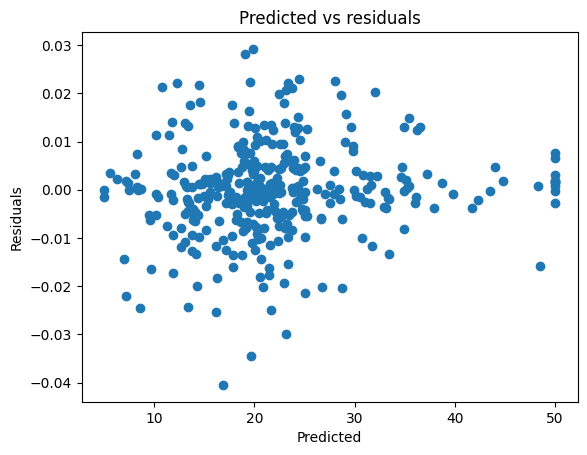

In [158]:
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Test data

In [159]:
#Predicting Test data with the model
y_test_pred = boost.predict(X_test)

# Model Evaluation

In [160]:
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.878995402311557
Adjusted R^2: 0.8675964184713414
MAE: 2.443827980443051
MSE: 11.814098491798395
RMSE: 3.437164309688787


# SVM Regressor

In [161]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [162]:
# Fit the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train SVM

In [166]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
support_vector = svm.SVR()

In [167]:
support_vector.fit(X_train, y_train)

SVR()

# Model Evaluation

In [170]:
y_train_pred = support_vector.predict(X_train)

# Model Evaluation

In [171]:
print('R^2:',metrics.r2_score(y_train, y_train_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))

print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2: 0.6620100538137381
Adjusted R^2: 0.6490869088124986
MAE: 2.8459607822332993
MSE: 26.26039248362243
RMSE: 5.124489485170443


# Visualizing the differences between actual prices and predicted values

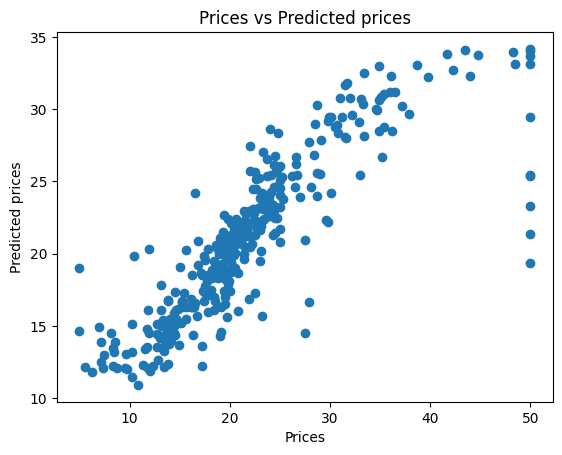

In [172]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

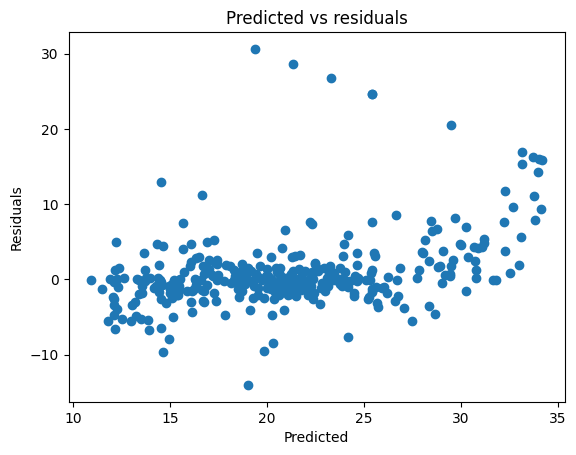

In [173]:
# Checking residuals
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Predicting Test data with the model

In [178]:
y_test_pred = support_vector.predict(X_test)

# Model Evaluation

In [179]:
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


R^2: 0.5688619672221287
Adjusted R^2: 0.5282475148589958
MAE: 3.8859918739953634
MSE: 42.093501239618206
RMSE: 6.487950465256205


# Evaluation and comparision of all the models

In [180]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})

models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,87.899540
1,Random Forest,87.525370
0,Linear Regression,69.962558
3,Support Vector Machines,56.886197


Hence XGBoost Regression works the best for this dataset.